# Mutliple Linear Regression Model (MLR)


### What is a Mutliple Linear Regression? 
It’s a statistical method that helps us model and study relationships between two or more variables.  In every linear regression model, there is an independent variable(X) and a dependent variable (Y). The concern here is whether we can distinguish a deterministic and statistical relationship 


### Our Regression Model 

•	As our explanatory variables (X) increase, does our response variable (Y) increase? 

•	Is there a relationship between the two or more variables? 

•	What is the best fitting line? 


#### Linear Equation 
$y = \beta_0 + \beta_1x_1$ + $\beta_2x_2$ + $\beta_nx_n$



* $y$ is the dependent variable

* $x$ is the independent variable

* $\beta_0$ is the intercept

* $\beta_1$ is the coefficient for x

* $\beta_2$ is the 2nd coefficient for x

#  I - Import Libraries & File

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew
from scipy.stats import shapiro

import pylab

%matplotlib inline

In [21]:
df = pd.read_csv('Desktop\\us_data.csv', index_col = 'Year')

In [22]:
df.tail()

,GDP growth (annual %),Gross capital formation (% of GDP),Population growth (annual %),"Birth rate, crude (per 1,000 people)",Broad money growth (annual %),Final consumption expenditure (annual % growth),General government final consumption expenditure (annual % growth),Gross capital formation (annual % growth),Households and NPISHs Final consumption expenditure (annual % growth),"Unemployment, total (% of total labor force) (national estimate)"
Year,,,,,,,,,,
2015,2.908022,21.178741,0.730641,12.4,3.143040,3.402891,1.573696,5.047991,3.799628,5.28
2016,1.637838,20.447652,0.716669,12.2,3.849432,2.590678,1.752039,-0.922272,2.767835,4.87
2017,2.369801,20.571660,0.631008,11.8,4.801954,2.272732,0.563488,3.318929,2.630026,4.36
2018,2.927326,21.072480,0.522337,11.6,4.030420,2.509776,1.548481,5.758467,2.708976,3.90
2019,2.161176,21.014289,0.473954,NaN,8.391899,2.307178,1.790142,2.136446,2.414129,3.67


# II - Data Preparation/Cleaning 

   * Alter Data Types (if any)
   * Renaming/Converting Columns
   * Finding and handling missing values (Regression Imputation)

In [23]:
#print data types
df.dtypes

GDP growth (annual %)                                                    float64
Gross capital formation (% of GDP)                                       float64
Population growth (annual %)                                             float64
Birth rate, crude (per 1,000 people)                                     float64
Broad money growth (annual %)                                            float64
Final consumption expenditure (annual % growth)                          float64
General government final consumption expenditure (annual % growth)       float64
Gross capital formation (annual % growth)                                float64
Households and NPISHs Final consumption expenditure (annual % growth)    float64
Unemployment, total (% of total labor force) (national estimate)         float64
dtype: object

In [24]:
#alter columns
col_names = {'GDP growth (annual %)': 'gdp_growth', 
            'Gross capital formation (% of GDP)': 'gross_capital_formation',
            'Population growth (annual %)': 'population_growth',
            'Birth rate, crude (per 1,000 people)': 'birth_rate',
            'Broad money growth (annual %)': 'board_money_growth',
            'Final consumption expenditure (annual % growth)': 'final_consumption_growth',
            'General government final consumption expenditure (annual % growth)': 'gov_final_consum_expend',
            'Gross capital formation (annual % growth)': 'gross_capital_growth',
            'Households and NPISHs Final consumption expenditure (annual % growth)': 'household_consum_expend',
            'Unemployment, total (% of total labor force) (national estimate)': 'unemployment' }

df.rename(columns = col_names, inplace = True)

In [25]:
#do we have missing values? 
df.isna().any()

gdp_growth                   True
gross_capital_formation      True
population_growth            True
birth_rate                   True
board_money_growth           True
final_consumption_growth     True
gov_final_consum_expend      True
gross_capital_growth         True
household_consum_expend      True
unemployment                False
dtype: bool

In [26]:
#assign a nan datagframe to display the missing values
nan_df = df[df.isna().any(axis = 1)]
nan_df

,gdp_growth,gross_capital_formation,population_growth,birth_rate,board_money_growth,final_consumption_growth,gov_final_consum_expend,gross_capital_growth,household_consum_expend,unemployment
Year,,,,,,,,,,
1960,NaN,NaN,NaN,23.7,NaN,NaN,NaN,NaN,NaN,5.50
1961,2.300000,NaN,1.657730,23.3,8.194606,NaN,NaN,NaN,NaN,6.70
1962,6.100000,NaN,1.537997,22.4,8.933828,NaN,NaN,NaN,NaN,5.50
1963,4.400000,NaN,1.439165,21.7,9.317126,NaN,NaN,NaN,NaN,5.70
1964,5.800000,NaN,1.389046,21.1,9.031670,NaN,NaN,NaN,NaN,5.20
1965,6.400000,NaN,1.250172,19.4,8.621521,NaN,NaN,NaN,NaN,4.50
1966,6.500000,NaN,1.154893,18.4,4.719901,NaN,NaN,NaN,NaN,3.80
1967,2.500000,NaN,1.088881,17.8,10.277516,NaN,NaN,NaN,NaN,3.80
1968,4.800000,NaN,0.998461,17.6,8.779050,NaN,NaN,NaN,NaN,3.60


## Regression Imputation 

Above we note that we have a ton of missing values. Missing data reduces the power of a trial but is at most times is expected. When handling missing/NAN data, the most common aproach is to simply omit those cases and analyze the remaing data.This is formally known as the 'complete case' analysis. 

However, for practice, I will use the Regression Imputation. This process is known for replacing missing data with estimated values - 'probable value' estimated by other value informaiton. 

Overall, this will help with increasing our sample size & therefore reduce our Standard Error.


In [27]:
#calculate the mean of the gdp_growth
col_mean = df['gdp_growth'].mean()

#replace the nan values with the mean
df = df.fillna(value = {'gdp_growth': col_mean})
df.head()

,gdp_growth,gross_capital_formation,population_growth,birth_rate,board_money_growth,final_consumption_growth,gov_final_consum_expend,gross_capital_growth,household_consum_expend,unemployment
Year,,,,,,,,,,
1960,3.034554,NaN,NaN,23.7,NaN,NaN,NaN,NaN,NaN,5.5
1961,2.300000,NaN,1.657730,23.3,8.194606,NaN,NaN,NaN,NaN,6.7
1962,6.100000,NaN,1.537997,22.4,8.933828,NaN,NaN,NaN,NaN,5.5
1963,4.400000,NaN,1.439165,21.7,9.317126,NaN,NaN,NaN,NaN,5.7
1964,5.800000,NaN,1.389046,21.1,9.031670,NaN,NaN,NaN,NaN,5.2


In [28]:
df.columns

Index(['gdp_growth', 'gross_capital_formation', 'population_growth',
       'birth_rate', 'board_money_growth', 'final_consumption_growth',
       'gov_final_consum_expend', 'gross_capital_growth',
       'household_consum_expend', 'unemployment'],
      dtype='object')

### Regression Imputation Function

In [29]:
#set up function
def regress_imput(dataframe, col_name):
    
    #calculate the mean of the column
    col_mean = dataframe[col_name].mean()
    
    #replace the nan values with the mean
    dataframe = dataframe.fillna(col_mean, inplace = True)
    
#call the function and impute the mean of the occcured column    
for columns in df.columns:
    regress_imput(df, df.columns)
    
df.head(10)

,gdp_growth,gross_capital_formation,population_growth,birth_rate,board_money_growth,final_consumption_growth,gov_final_consum_expend,gross_capital_growth,household_consum_expend,unemployment
Year,,,,,,,,,,
1960,3.034554,22.010915,1.011976,23.7,7.274925,2.709522,1.434149,3.582923,3.030236,5.5
1961,2.300000,22.010915,1.657730,23.3,8.194606,2.709522,1.434149,3.582923,3.030236,6.7
1962,6.100000,22.010915,1.537997,22.4,8.933828,2.709522,1.434149,3.582923,3.030236,5.5
1963,4.400000,22.010915,1.439165,21.7,9.317126,2.709522,1.434149,3.582923,3.030236,5.7
1964,5.800000,22.010915,1.389046,21.1,9.031670,2.709522,1.434149,3.582923,3.030236,5.2
1965,6.400000,22.010915,1.250172,19.4,8.621521,2.709522,1.434149,3.582923,3.030236,4.5
1966,6.500000,22.010915,1.154893,18.4,4.719901,2.709522,1.434149,3.582923,3.030236,3.8
1967,2.500000,22.010915,1.088881,17.8,10.277516,2.709522,1.434149,3.582923,3.030236,3.8
1968,4.800000,22.010915,0.998461,17.6,8.779050,2.709522,1.434149,3.582923,3.030236,3.6


# III - Multicollinearity

Since we're now running a MLR(Multivariate Linear Regression) & not a SLR (Simple Linear Regression), we cannot ignore multicollinearity.

### Why is it a potential problem?
Multicollinearity exists when two or more predictors (X Variables) are correlated. This becomes an issues because the predictors should be independent of each other. If this exists, the following pitfalls can be exacerbated - 

* our regression coefficient may be an imprecise estimate
* the precision of the estimated regression coefficients decreases as more predictors are added to the model


### Detecting Multicollinearity ? 

Multicollinearity is detected by examining the tolerance for each independent variable. Tolerance is the amount of variability in one independent variable that is no explained by the other independent variables.

Methods we will use detect multicollinearity: 

* **Correlation Matrix Heatmap**

* **Variation Inflation Factor**



#### Variation Inflation Factor (VIF):

As presented in the name, VIF quantifies how much the varaince is inflated - meaning our Standard Errors of the Estimated Coefficients are inflated and imprecise 

### Scatter & Corrlation Matrix

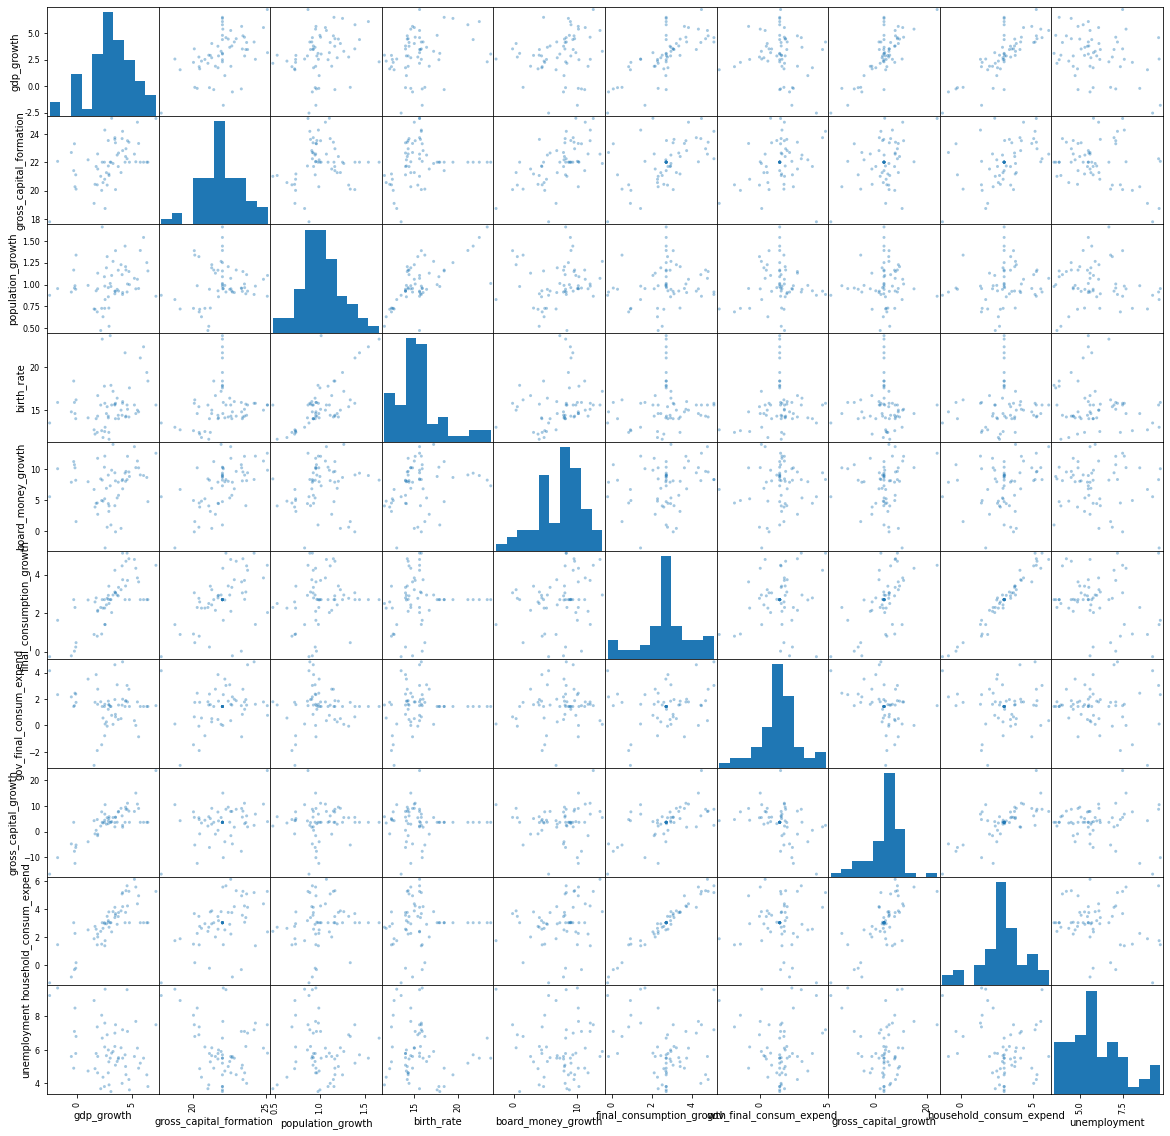

In [30]:
pd.plotting.scatter_matrix(df, alpha = .4, figsize = (20,20))
plt.show()

In [31]:
corr = df.corr()
corr

,gdp_growth,gross_capital_formation,population_growth,birth_rate,board_money_growth,final_consumption_growth,gov_final_consum_expend,gross_capital_growth,household_consum_expend,unemployment
gdp_growth,1.000000,0.479948,0.249153,0.263822,0.172015,0.721798,-0.136542,0.785977,0.771378,-0.312103
gross_capital_formation,0.479948,1.000000,0.136660,0.197726,0.584076,0.518193,0.288821,0.369281,0.463722,-0.279146
population_growth,0.249153,0.136660,1.000000,0.689628,0.120224,0.152344,0.059241,0.034430,0.146955,-0.070715
birth_rate,0.263822,0.197726,0.689628,1.000000,0.231216,0.097740,0.150488,-0.011644,0.072097,-0.153887
board_money_growth,0.172015,0.584076,0.120224,0.231216,1.000000,0.248531,0.111945,0.078608,0.240977,-0.079595
final_consumption_growth,0.721798,0.518193,0.152344,0.097740,0.248531,1.000000,0.215468,0.614279,0.973371,-0.227029
gov_final_consum_expend,-0.136542,0.288821,0.059241,0.150488,0.111945,0.215468,1.000000,-0.376330,-0.010836,-0.074132
gross_capital_growth,0.785977,0.369281,0.034430,-0.011644,0.078608,0.614279,-0.376330,1.000000,0.713669,-0.111014
household_consum_expend,0.771378,0.463722,0.146955,0.072097,0.240977,0.973371,-0.010836,0.713669,1.000000,-0.206097
unemployment,-0.312103,-0.279146,-0.070715,-0.153887,-0.079595,-0.227029,-0.074132,-0.111014,-0.206097,1.000000


From above, we can suggest that some of the predictors are corrlated or at least moderately correlated.

**r** = Correlation Coefficient - Measures the strength and direction of the relationship between two variables

For example:
    * board_money_growth & gross_capital_formation (r = .584)
    * birth_rate & population_growth (r = .689)
    * household_consum_expend & final_consumption_growth (r = .97)
    * final_consumption_growth & gross_capital_formation (r = .51)

### Variation Inflation Factor (VIF)

To calculate the VIF for each explanatory variable in the model, we can use the variance_inflation_factor() function from the statsmodels library:

In [32]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('gdp_growth ~ gross_capital_formation+population_growth + birth_rate+board_money_growth + final_consumption_growth+gov_final_consum_expend+gross_capital_growth + household_consum_expend + unemployment', 
                 data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,577.542299,Intercept
1,2.687005,gross_capital_formation
2,2.006095,population_growth
3,2.136698,birth_rate
4,2.014959,board_money_growth
5,881.236840,final_consumption_growth
6,46.995953,gov_final_consum_expend
7,3.523480,gross_capital_growth
8,835.790382,household_consum_expend
9,1.223161,unemployment


### Interpreting VIF Values
The value for VIF starts at 1 and has no upper limit. A general rule of thumb for interpreting VIFs is as follows:

 * A value of 1 indicates there is no correlation between a given explanatory variables  and any other explanatory variables 
 
 * A value between 1 and 5 indicates moderate correlation between a explanatory variables and another explanatory variables in the model, but this is okay to proceed with
 
 * A value greater than 5 indicates potentially severe correlation between a given explanatory variable and other explanatory variables in the model. In this case, the coefficient estimates and p-values in the regression output are likely unreliable

### Create new Dataframe and drop highly correlated predictors 

In [33]:
df_2 = df.drop(['gross_capital_formation', 'birth_rate', 'board_money_growth','final_consumption_growth', 'gov_final_consum_expend'], axis = 1)

In [34]:
df_2.tail()

,gdp_growth,population_growth,gross_capital_growth,household_consum_expend,unemployment
Year,,,,,
2015,2.908022,0.730641,5.047991,3.799628,5.28
2016,1.637838,0.716669,-0.922272,2.767835,4.87
2017,2.369801,0.631008,3.318929,2.630026,4.36
2018,2.927326,0.522337,5.758467,2.708976,3.90
2019,2.161176,0.473954,2.136446,2.414129,3.67


In [35]:
y, X2 = dmatrices('gdp_growth ~ population_growth + gross_capital_growth + household_consum_expend + unemployment', 
                 data=df_2, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['variable'] = X2.columns
vif

,VIF,variable
0,43.193859,Intercept
1,1.034138,population_growth
2,2.064181,gross_capital_growth
3,2.167520,household_consum_expend
4,1.048670,unemployment


We find that the variance inflation factors are reduced significantly and satisfactorily. I feel comfortable proceeding with more research

Analyze the correlation for df_2, after we dropped highly correlated values

In [36]:
df_2.corr()

,gdp_growth,population_growth,gross_capital_growth,household_consum_expend,unemployment
gdp_growth,1.000000,0.249153,0.785977,0.771378,-0.312103
population_growth,0.249153,1.000000,0.034430,0.146955,-0.070715
gross_capital_growth,0.785977,0.034430,1.000000,0.713669,-0.111014
household_consum_expend,0.771378,0.146955,0.713669,1.000000,-0.206097
unemployment,-0.312103,-0.070715,-0.111014,-0.206097,1.000000


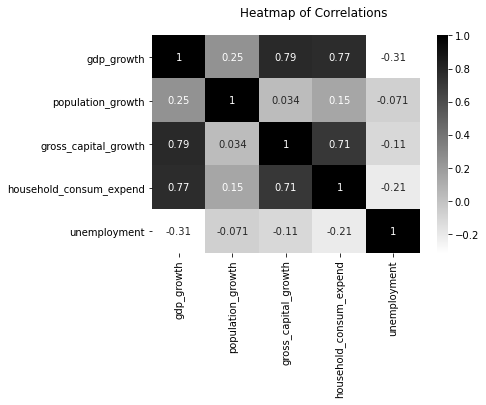

In [37]:
#create heatmap
sns.heatmap(df_2.corr(),xticklabels=df_2.columns, yticklabels=df_2.columns, cmap='binary', annot=True)
plt.suptitle('Heatmap of Correlations');

# IV - Building the Linear Regression Model  
 
 * Split assigned X & Y variables
 * Creating and Fitting the Regression Model (sklearn & statsmodel)
 * Model Evaluation 
 * Model Assumptions (L.I.N.E)
 * Predictions / Conclusions


### Let's start by building a Simple Linear Regression for practice

In [68]:
#assign x & y variables 
X_p = df_2['household_consum_expend'].values.reshape(-1, 1)
Y_p = df_2['gdp_growth'].values


#assign our training and testing data samples
X_trainp, X_testp, Y_trainp, Y_testp = train_test_split(X_p,Y_p, test_size = .2, random_state = 1)

#fit the model
ols = LinearRegression()
model = ols.fit(X_trainp, Y_trainp)

#predict data
response = model.predict(X_testp)

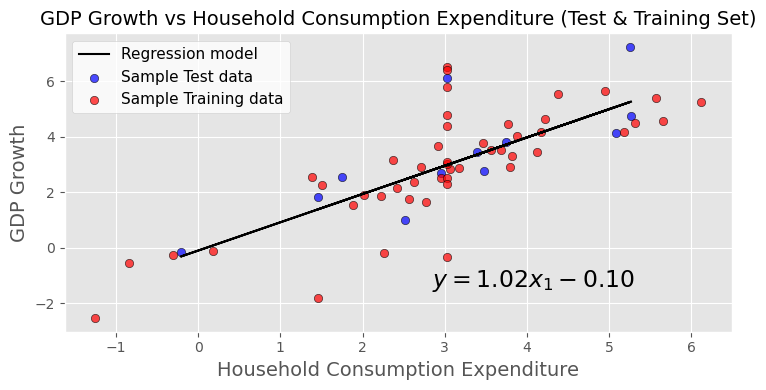

In [79]:
#style of the plot
plt.style.use('default')
plt.style.use('ggplot')

#figure size
fig, ax = plt.subplots(figsize=(8, 4))

#plotting regression line and scatter test data
ax.scatter(X_testp, Y_testp, edgecolor='k', facecolor='blue', alpha=0.7, label='Sample Test data')
ax.scatter(X_trainp, Y_trainp, edgecolor='k', facecolor='red', alpha=0.7, label='Sample Training data')
ax.plot(X_testp, response , color='k', label='Regression model')

#set
ax.set_ylabel('GDP Growth', fontsize=14)
ax.set_xlabel('Household Consumption Expenditure', fontsize=14)


ax.legend(facecolor='white', fontsize=11)
ax.set_title('GDP Growth vs Household Consumption Expenditure (Test & Training Set)', fontsize=14)

ax.text(0.55, 0.15, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)



fig.tight_layout()

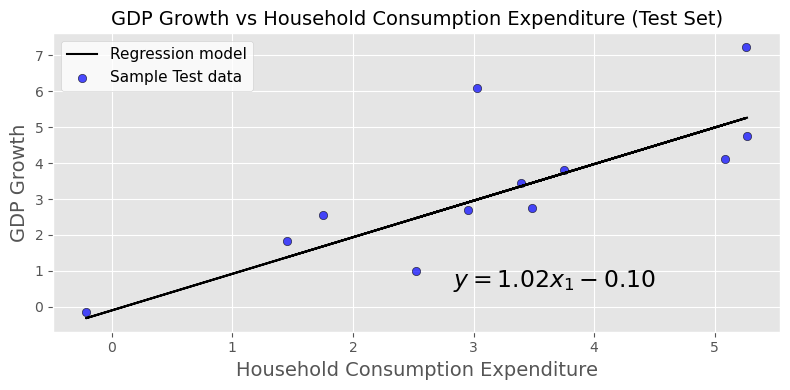

In [72]:
#style of the plot
plt.style.use('default')
plt.style.use('ggplot')

#figure size
fig, ax = plt.subplots(figsize=(8, 4))

#plotting regression line and scatter test data
ax.plot(X_testp, response , color='k', label='Regression model')
ax.scatter(X_testp, Y_testp, edgecolor='k', facecolor='blue', alpha=0.7, label='Sample Test data')
#ax.scatter(X_trainp, Y_trainp, edgecolor='k', facecolor='red', alpha=0.7, label='Sample Training data')

#set
ax.set_ylabel('GDP Growth', fontsize=14)
ax.set_xlabel('Household Consumption Expenditure', fontsize=14)


ax.legend(facecolor='white', fontsize=11)
ax.set_title('GDP Growth vs Household Consumption Expenditure (Test Set)', fontsize=14)

ax.text(0.55, 0.15, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)



fig.tight_layout()

In [85]:
print(round(model.score(X_trainp, Y_trainp),2))
print(round(model.score(X_testp, Y_testp),2))

0.59
0.6


### Multi-Linear Model

In [87]:
df_2.columns

Index(['gdp_growth', 'population_growth', 'gross_capital_growth',
       'household_consum_expend', 'unemployment'],
      dtype='object')

In [129]:
#assign features
features = ['population_growth', 'gross_capital_growth', 'household_consum_expend', 'unemployment']


#assign x & y variables 
x_1 = df_2[features].values.reshape(-1, len(features))
y_1 = df_2['gdp_growth']

#assign test and train data
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(x_1,y_1, test_size = .2, random_state = 1)

#fit the model
model = LinearRegression()
results = model.fit(X_train_1,Y_train_1)
responsee = model.predict(X_test_1)

### Plot Histograms of Actual & Fitting Values (are they Normally distributed?)

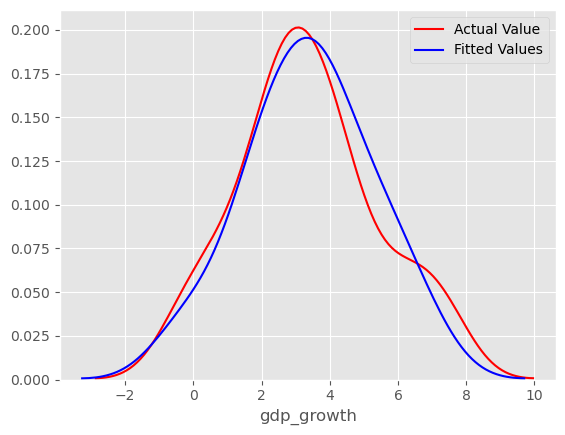

In [130]:
ax1 = sns.distplot(Y_test_1, hist=False, color="r", label="Actual Value")
sns.distplot(responsee, hist=False, color="b", label="Fitted Values" , ax=ax1)

## Let's Analyze the Following Metrics to Assess the Model

* Sum of Squared Errors (SSE)
* Total Sum of Squares (SST)
* $R^{2}$
* adj $R^{2}$

To get an idea of how precise future predictors will be, we need to know how much the Response Variable (Y) will vary around the mean population line. Again the whole idea here is to draw conclusions for the population and not so much the observed. 

### Sum of squared errors (SSE) 

SSE, is measure of how far off our model's predictions are from the observed values. A value of 0 indicates perfect predictions. A non-zero value indicates errors. We expect a non-zero value. Why? Because there is almost always irreducible error that we just can't get around unless we're dealing with some trivial problem.

### Total Sum of squared errors (SST)
SST is a measure of the variance in the target variable. It is measured simply as the sum of each observation from the target mean.


In [158]:
#assign Y
target = Y_test_1

#the unexpected error (sse) is (Y - Y Predicted)^2
squared_errors = (target - model.predict(X_test_1)) **2
sse = np.sum(squared_errors)
sse

#total to the mean (Y - Y average)^2
avg_y = np.mean(Y_test_1)
squared_errors = (target - avg_y) **2
sst = np.sum(squared_errors)


print(f"The SSE & SST - {sse,sst}")
print(f"Our R Squared {(1 - sse/sst)}")

The SSE & SST - (9.595828790241983, 46.83363628606073)
Our R Squared 0.7951081839635411


### Final Sklearn Model

In [141]:
#assign x & y variables 
x = df_2.drop(['gdp_growth'], axis = 1)
y = df_2[['gdp_growth']]

#assign test and train data
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = .2, random_state = 1)

#fit the model
final_model = LinearRegression()
results = final_model.fit(X_train,Y_train)


In [146]:
print (final_model.intercept_, model.coef_)

[1.10516852] [ 1.29826359  0.14570159  0.53035675 -0.25253426]


In [156]:
#print Y intercept & Coefficient 
print (final_model.intercept_, model.coef_)

#assign intercept and coefficent varaibles
intercept = final_model.intercept_[0]
coefficient = final_model.coef_[0][0]

print("The Y intercept for the linear model is {:.4}".format(intercept))

for coef in zip(x.columns, final_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

[1.10516852] [ 1.29826359  0.14570159  0.53035675 -0.25253426]
The Y intercept for the linear model is 1.105
The Coefficient for const is 1.3
The Coefficient for population_growth is 0.15
The Coefficient for gross_capital_growth is 0.53
The Coefficient for household_consum_expend is -0.25


In [150]:
predictions = final_model.predict(X_test)
predictions[:10]

array([[ 5.48241424],
       [ 1.94982205],
       [ 3.84209965],
       [-0.14430449],
       [ 2.19963066],
       [ 4.04012029],
       [ 3.70608342],
       [ 3.20649597],
       [ 5.12577841],
       [ 3.01067411]])

## Rebuilding our Model with Statsmodel.api

After you fit the model, unlike with statsmodels, SKLearn does not automatically print the concepts or have a method like summary. So we have to print the coefficients separately - so the main benefit of statsmodels is the other statistics it provides

In [159]:
#assign x variable
x = df_2.drop(['gdp_growth'], axis = 1)
x = sm.add_constant(x)

#OLS model
stats_model = sm.OLS(y, x)


regres = stats_model.fit()

print(regres.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     45.02
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           9.91e-17
Time:                        01:49:01   Log-Likelihood:                -83.553
No. Observations:                  60   AIC:                             177.1
Df Residuals:                      55   BIC:                             187.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

$\hat{y_i}$ = $\beta_0$ + $\beta_1$ + $\beta_2$ + $\beta_px_p$



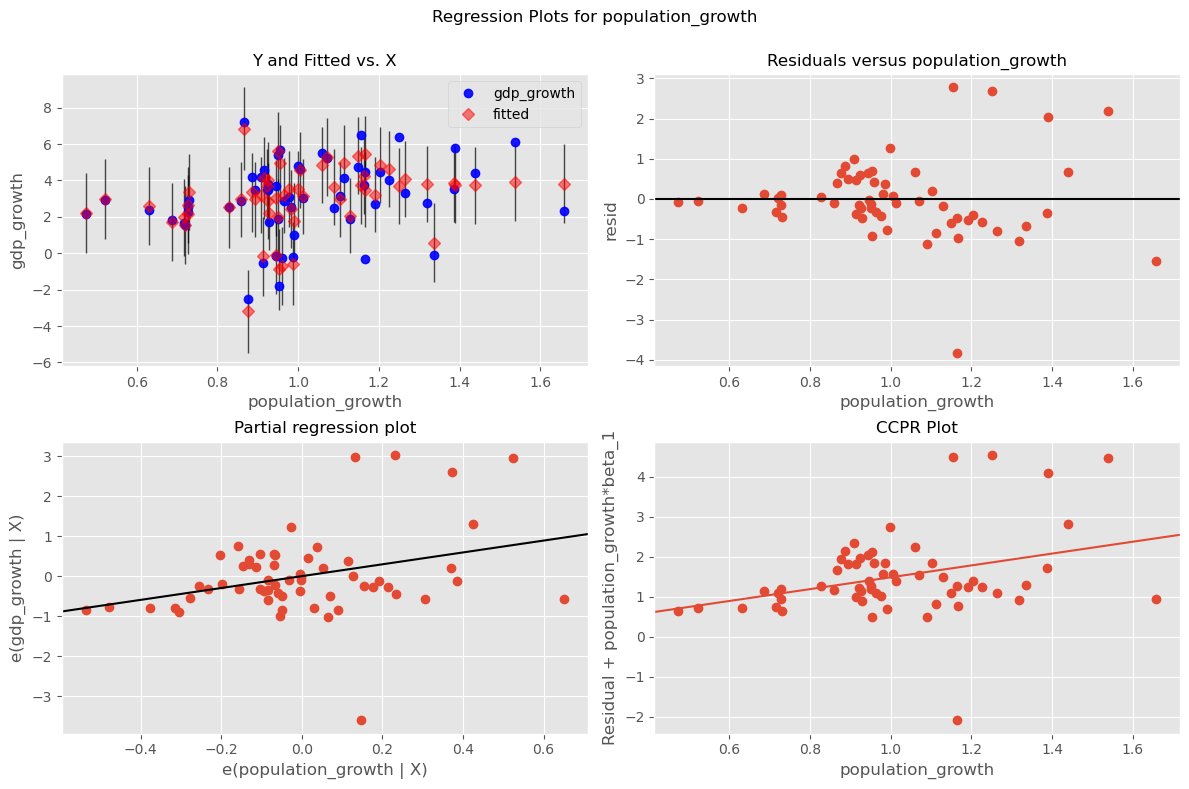

In [168]:
fig = plt.figure(figsize = (12,8))
fig = sm.graphics.plot_regress_exog(regres, 'population_growth', fig = fig)

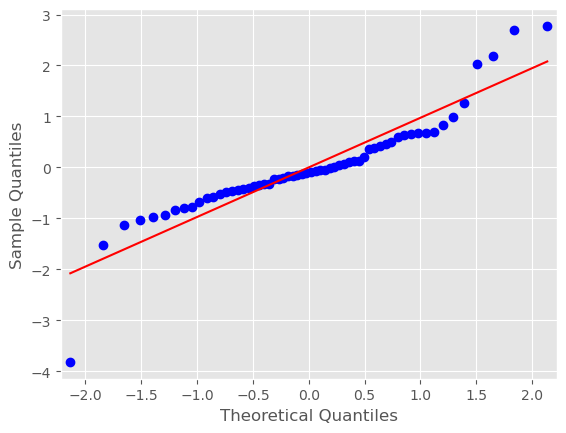

The mean of the residuals is -3.098e-15


In [160]:
import pylab

sm.qqplot(regres.resid, line='s')
pylab.show()

mean_residuals = sum(regres.resid)/ len(regres.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))